<a href="https://colab.research.google.com/github/simandi2877/eva/blob/master/Project2/Session2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Not an ideal network**

Install and import keras libraries into google colab. keras runs on top of TesorFlow.

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Import numpy for numerical operators in python.

Import Keras related image processing API.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

mnist.load_data() will load the mnist data from keras datasets.

MNIST dataset contains 60000 samples of "various forms of handwritten numbers 0-9". The output of the load_data() will provie tuples of training and test data.

X_train	60000x784 uint8 (containing 60000 training samples of 28x28 images each linearized into a 1x784 linear vector)

y_train	60000x10 uint8 (containing 1x10 vectors having labels for the 60000 training samples). This would label a particular sample on what number it is.

X_test	10000x784 uint8 (containing 10000 test samples of 28x28 images each linearized into a 1x784 linear vector)

y_test	10000x10 uint8 (containing 1x10 vectors having labels for the 10000 test samples)

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)
[  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
 175  26 166 255 247 127   0   0   0   0]


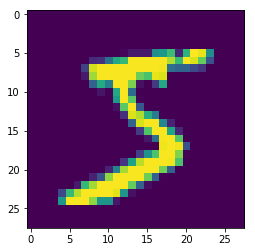

In [66]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(X_train[0,5])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [92]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Converts a class vector (integers) to binary class matrix.

Convert the [5, 0, 4, 1, 9, 2, 1, 3, 1, 4] to 

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]]

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [109]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [100]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Convolution2D(256, 3, 3, activation='relu'))
#model.add(Convolution2D(512, 3, 3, activation='relu'))
#model.add(Convolution2D(1024, 3, 3, activation='relu'))
#model.add(Convolution2D(2048, 3, 3, activation='relu'))
#model.add(Convolution2D(10, 3, 3, activation='relu'))

model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3, 3, activation='relu'))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 9, 9, 32)          36896     
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 5, 5, 128)         73856     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: 

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [103]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 15s 257us/step - loss: 2.3020 - acc: 0.1118
Epoch 2/10
60000/60000 [==============================] - 15s 247us/step - loss: 2.3019 - acc: 0.1124
Epoch 3/10
60000/60000 [==============================] - 15s 246us/step - loss: 2.3018 - acc: 0.1124
Epoch 4/10
60000/60000 [==============================] - 15s 253us/step - loss: 2.3018 - acc: 0.1124
Epoch 5/10
60000/60000 [==============================] - 15s 244us/step - loss: 2.3018 - acc: 0.1124
Epoch 6/10
60000/60000 [==============================] - 15s 246us/step - loss: 2.3018 - acc: 0.1124
Epoch 7/10
60000/60000 [==============================] - 15s 257us/step - loss: 2.3018 - acc: 0.1124
Epoch 8/10
60000/60000 [==============================] - 15s 244us/step - loss: 2.3018 - acc: 0.1124
Epoch 9/10
60000/60000 [==============================] - 15s 252us/step - loss: 2.3018 - acc: 0.1124
Epoch 10/10
60000/60000 [==============================] - 15s 245us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [105]:
print(score)

[2.3016724426269533, 0.1135]


In [0]:
y_pred = model.predict(X_test)

In [107]:
print(y_pred[:9])
print(y_test[:9])

[[0.09888843 0.11000416 0.09888843 0.09888843 0.09888843 0.09888843
  0.09888843 0.09888843 0.09888843 0.09888843]
 [0.09888843 0.11000416 0.09888843 0.09888843 0.09888843 0.09888843
  0.09888843 0.09888843 0.09888843 0.09888843]
 [0.09888843 0.11000416 0.09888843 0.09888843 0.09888843 0.09888843
  0.09888843 0.09888843 0.09888843 0.09888843]
 [0.09888843 0.11000416 0.09888843 0.09888843 0.09888843 0.09888843
  0.09888843 0.09888843 0.09888843 0.09888843]
 [0.09888843 0.11000416 0.09888843 0.09888843 0.09888843 0.09888843
  0.09888843 0.09888843 0.09888843 0.09888843]
 [0.09888843 0.11000416 0.09888843 0.09888843 0.09888843 0.09888843
  0.09888843 0.09888843 0.09888843 0.09888843]
 [0.09888843 0.11000416 0.09888843 0.09888843 0.09888843 0.09888843
  0.09888843 0.09888843 0.09888843 0.09888843]
 [0.09888843 0.11000416 0.09888843 0.09888843 0.09888843 0.09888843
  0.09888843 0.09888843 0.09888843 0.09888843]
 [0.09888843 0.11000416 0.09888843 0.09888843 0.09888843 0.09888843
  0.09888843